## Векторная модель текста в NLTK
### Задание 1
Возьмем файл alice.txt с прошлого семинара. Мы уже научились разбивать его на токены и удалять стоп-слова.
Используя nltk.FreqDist, выведите 20 самых часто встречающихся слов в тексте (не удаляя стоп символы).

Ответьте на вопросы:

    Какое слово стоит на 1 месте?
    Сколько раз встречается слово, стоящее на 20 месте?
    Сколько не стоп-слов среди первых десяти?
    Сколько раз встречается слово "крокет"? (понятно, что оно не входит в top20)


In [ ]:
# скачиваем текста, стоп слова, пунктуацию и устанавливаем pymorphy/gensim
!wget https://raw.githubusercontent.com/Tviskaron/IDA2-2019/master/sem-11/alice.txt -N
!wget https://raw.githubusercontent.com/Tviskaron/IDA2-2019/master/sem-11/dinos.txt -N
import nltk
nltk.download('punkt')
import nltk
nltk.download('stopwords')
!pip install pymorphy2
!pip install -U gensim

In [3]:
s = ""
with open("alice.txt") as infile:
    for line in infile:
        s += line.strip() + ' '
from nltk.corpus import stopwords
from string import punctuation
from nltk.tokenize import word_tokenize
tokenized = word_tokenize(s)

In [4]:
l1 = list(map(lambda x: x.lower(), tokenized))
import nltk

d1 = nltk.FreqDist(l1)
d1.most_common(20)

[(',', 2429),
 ('–', 1936),
 ('.', 1532),
 ('и', 748),
 ('!', 575),
 ('не', 542),
 ('в', 390),
 ('алиса', 377),
 ('она', 366),
 ('что', 340),
 ('на', 282),
 ('я', 270),
 ('?', 243),
 ('а', 232),
 ('с', 215),
 ('как', 189),
 (':', 185),
 ('это', 176),
 ('все', 174),
 ('он', 140)]

In [5]:
# 1. 
print("В1. Какое слово стоит на 1 месте? Ответ:", d1.most_common(100)[0][0])

В1. Какое слово стоит на 1 месте? Ответ: ,


In [6]:
# 2. 
print("В2. Сколько раз встречается слово, стоящее на 20 месте? Ответ:", d1.most_common(100)[19][1])

В2. Сколько раз встречается слово, стоящее на 20 месте? Ответ: 140


In [7]:
# 3. 
top10 = [word[0] for word in d1.most_common(10)]
print("Топ 10 слов:\n", top10)
top10without_stop_words = [word for word in top10 if word not in stopwords.words('russian')]
print("Топ 10 слов, без стоп слов:\n", top10without_stop_words)
print("\nВ3. Сколько не стоп-слов среди первых десяти? Ответ:", len(top10without_stop_words))

Топ 10 слов:
 [',', '–', '.', 'и', '!', 'не', 'в', 'алиса', 'она', 'что']
Топ 10 слов, без стоп слов:
 [',', '–', '.', '!', 'алиса']

В3. Сколько не стоп-слов среди первых десяти? Ответ: 5


In [8]:
# 4. 
print("В4. Сколько раз встречается слово 'крокет'? Ответ:", dict(d1)["крокет"])

В4. Сколько раз встречается слово 'крокет'? Ответ: 7


### Задание 2
Избавьтесь от стоп-слов с помощью списка stopwords из nltk.corpus. Используйте pymorphy2 или Mystem, чтобы привести слова к нормальной форме. Ответьте на вопросы:

    Какое слово стоит на 1 месте?
    Сколько раз встречается слово, стоящее на 20 месте?
    Остались ли какие-то стоп-слова среди первых 10? 20?
    Сколько раз встречается слово "крокет"? Почему результат изменился?


In [9]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()
l3 = [morph.parse(token)[0].normal_form for token in l1 if not token in stopwords.words('russian')]
d3 = nltk.FreqDist(l3)
d3.most_common(20)

[(',', 2429),
 ('–', 1936),
 ('.', 1532),
 ('!', 575),
 ('алиса', 417),
 ('сказать', 257),
 ('?', 243),
 (':', 185),
 ('это', 183),
 ('*', 108),
 ('спросить', 78),
 ('«', 76),
 ('»', 76),
 ('королева', 75),
 ('подумать', 73),
 ('король', 65),
 ('очень', 64),
 ('свой', 64),
 ('мочь', 63),
 ('один', 63)]

Давайте построим кумулятивный график частот слов. Как он выглядит и почему так? Попробуйте поменять количество слов, какие тенденции вы видите?


In [10]:
# 1. 
print("В1. Какое слово стоит на 1 месте? Ответ:", d3.most_common(100)[0][0])

В1. Какое слово стоит на 1 месте? Ответ: ,


In [11]:
# 2. 
print("В2. Сколько раз встречается слово, стоящее на 20 месте? Ответ:", d3.most_common(100)[19][1])

В2. Сколько раз встречается слово, стоящее на 20 месте? Ответ: 63


In [12]:
# 3. 
stop_inside = [word[0] for word in d3.most_common(20) if word[0] in stopwords.words('russian')]
print("Оставшиеся стоп слова:", stop_inside)
print("В3. Остались ли какие-то стоп-слова среди первых 10? 20? Ответ:", "Да" if len(stop_inside) else "Нет")

Оставшиеся стоп слова: ['один']
В3. Остались ли какие-то стоп-слова среди первых 10? 20? Ответ: Да


In [13]:
# 4. 
for word in l1:
    if word.find("крокет") != -1 and word != "крокет" and morph.parse(word)[0].normal_form == "крокет":
        answer = word + " -> " + morph.parse(word)[0].normal_form

print('В4-1. Сколько раз встречается слово "крокет"? Ответ:', dict(d3)["крокет"])
print("В4-2. Почему результат изменился? Ответ:", answer)

В4-1. Сколько раз встречается слово "крокет"? Ответ: 8
В4-2. Почему результат изменился? Ответ: крокету -> крокет


In [14]:
d3.plot(30, cumulative = True)

<Figure size 640x480 with 1 Axes>

### Задание 3

Найдите распределение длин слов в тексте, выведите top5 и ответьте на вопросы:

    Сколько всего в данном тексте вариантов длин слов (вместе со стоп-словами)?
    Слов какой длины в тексте больше всего?
    Какую долю занимают слова этой длины?
    Сколько слов длины 1?

Выведите в алфавитном поредке длинные слова (длиннее 15 символов).

    Сколько их?

In [15]:
fdist = nltk.FreqDist(len(w) for w in l1)  
print(fdist)  
print (fdist.most_common(5))

<FreqDist with 17 samples and 27333 outcomes>
[(1, 9446), (3, 2899), (5, 2765), (6, 2477), (2, 2433)]


In [16]:
long_words = [w for w in l1 if len(w) > 15]
print(sorted(long_words))
print("Сколько их? Ответ:", len(long_words))

['крабом-старичком', 'многозначительно', 'несправедливости…']
Сколько их? Ответ: 3


In [17]:
# 1.
print("Сколько всего в данном тексте вариантов длин слов (вместе со стоп-словами)? Ответ:", len(fdist))

Сколько всего в данном тексте вариантов длин слов (вместе со стоп-словами)? Ответ: 17


In [18]:
# 2. 
sorted_by_length = sorted(fdist.most_common(None), key=lambda x: x[1], reverse=True)
print("Слов какой длины в тексте больше всего? Ответ:", sorted_by_length[0][0])

Слов какой длины в тексте больше всего? Ответ: 1


In [19]:
# 3. 
answer = sorted_by_length[0][1] / (sum([_[1] for _ in sorted_by_length]))
print("Какую долю занимают слова этой длины? Ответ:", round(answer, 2))

Какую долю занимают слова этой длины? Ответ: 0.35


### Задание 4

Превратите строку в NLTK-текст и проверьте, как работают спецфункции, на собственных примерах.


In [20]:
text = nltk.Text(l1)
# A concordance view shows us every occurrence of a given word, together with some context
print (text.concordance("он"))
print("********" * 10)
# Using similar(token) returns a list of words that appear in the same context as token. 
# In this case the the context is just the words directly on either side of token.
print (text.similar('он'))
print("********" * 10)
# The term common_contexts allows us to examine just the contexts that are shared by two or more words
print (text.common_contexts(["алиса", "он"]))
print("********" * 10)
# A collocation is a sequence of words that occur together unusually often.
print (text.collocations(30))

Displaying 25 of 140 matches:
и только-только успела заметить , что он юркнул в нору под изгородью . в тот ж
и , то ли ключик слишком мал , только он не подошел ни к одной , как она ни ст
ажину – и , к величайшей ее радости , он подошел ! она открыла дверцу и увидел
. напиток был очень приятен на вкус – он чем-то напоминал вишневый пирог с кре
. это возвращался белый кролик . одет он был парадно , в одной руке держал пар
, а в другой – большой веер . на бегу он тихо бормотал : – ах , боже мой , что
я над песком прилежно пенит нил ! как он умело шевелит опрятным коготком ! – к
велит опрятным коготком ! – как рыбок он благодарит , глотая целиком ! – слова
 волнистая ! бросишь ему что-нибудь , он тотчас несет назад , а потом сядет на
чтобы ему дали косточку ! чего только он ни делает – всего не упомнишь ! хозяи
 не упомнишь ! хозяин у него фермер , он говорит : этому песику цены нет ! он 
 он говорит : этому песику цены нет ! он всех крыс перебил в округе и всех мыш
то к чему ! алиса потр

## Эмбеддинги


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
from sklearn.metrics import *
from sklearn.feature_extraction.text import *
from sklearn.model_selection import train_test_split
from collections import Counter, defaultdict
import warnings
warnings.filterwarnings('ignore')
random.seed(1228)

%matplotlib inline

Скачиваем куски датасета твитов ([источник](http://study.mokoron.com/)): [положительные](https://www.dropbox.com/s/fnpq3z4bcnoktiv/positive.csv?dl=0), [отрицательные](https://www.dropbox.com/s/ilkte35m35l38mr/negative.sql).

In [22]:
!wget https://www.dropbox.com/s/fnpq3z4bcnoktiv/positive.csv?dl=0 -N
!wget https://www.dropbox.com/s/r6u59ljhhjdg6j0/negative.csv?dl=0 -N

--2019-04-23 17:21:40--  https://www.dropbox.com/s/fnpq3z4bcnoktiv/positive.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.71.1, 2620:100:6028:1::a27d:4701
Connecting to www.dropbox.com (www.dropbox.com)|162.125.71.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/fnpq3z4bcnoktiv/positive.csv [following]
--2019-04-23 17:21:41--  https://www.dropbox.com/s/raw/fnpq3z4bcnoktiv/positive.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6333defcc51b094318875dea91.dl.dropboxusercontent.com/cd/0/inline/AfmiYWDL4jgwRv6lORTDNaYG4GONf7IA-CTeAmMqRJCxRImMhw_6vF3yF7Y42VYgwBRbch5b7V0rhSWbEn_HLX2OFPTSvRw5mY4-BTqSaRQau76VSVER7VJcmHNw2y4vdUM/file# [following]
--2019-04-23 17:21:41--  https://uc6333defcc51b094318875dea91.dl.dropboxusercontent.com/cd/0/inline/AfmiYWDL4jgwRv6lORTDNaYG4GONf7IA-CTeAmMqRJCxRImMhw_6vF3yF7Y42VYgwBRbch5b7V0rhSWbEn_HLX2OFPTSvRw5mY4-BTqSaR

Загружаем лемматизированные статьи без стоп-слов и создаем массив текстов

In [23]:
from pymystem3 import Mystem
import re

from pymorphy2 import MorphAnalyzer
pymorphy2_analyzer = MorphAnalyzer()


regex = re.compile("[А-Яа-я:=!\)\()A-z\_\%/|]+")

def words_only(text, regex=regex):
    try:
        return " ".join(regex.findall(text))
    except:
        return ""



def lemmatize(text):
  return " ".join(pymorphy2_analyzer.parse(word)[0].normal_form for word in word_tokenize(text))
    
# уменьшим число строк, для ускорения работы (~7-10 минут)
max_rows_to_load = 50000
df_neg = pd.read_csv("negative.csv?dl=0", sep=';', header = None, usecols = [3], nrows=max_rows_to_load)
df_pos = pd.read_csv("positive.csv?dl=0", sep=';', header = None, usecols = [3], nrows=max_rows_to_load)

df_neg['sent'] = 'neg'
df_pos['sent'] = 'pos'
df_pos['text'] = df_pos[3]
df_neg['text'] = df_neg[3]
df = pd.concat([df_neg, df_pos])
df = df[['text', 'sent']]
df.text = df.text.apply(words_only)
df.text = df.text.apply(lemmatize)
df.text = df.text.apply(lambda text: text.lower())

In [24]:
print(df.shape)
df.head()

(100000, 2)


,text,sent
0,на работа быть полный пиддес : | и так каждый ...,neg
1,коллега сидеть рубиться в urban terror а я из ...,neg
2,elina_ post как говорят обещаной три год ждать...,neg
3,желать хороший половина тот и удачный посадка ...,neg
4,обновить за какой то леший surf теперь не рабо...,neg


In [25]:
df.tail()

,text,sent
49995,для счастие много не надо : ) ) нашеместо унив...,pos
49996,vyatkina_ ты сам говорить что парка на весь тп...,pos
49997,patronusholmes showmethedoctor можно в принцип ),pos
49998,rt tbnttepckne : одноклассник в соц сеть делит...,pos
49999,так вот я сидеть с идиотский улыбка на лицо и ...,pos


In [26]:
texts = [df.text.iloc[i].split() for i in range(len(df))]

### Обучение модели в gensim

In [27]:
texts[0]

['на',
 'работа',
 'быть',
 'полный',
 'пиддес',
 ':',
 '|',
 'и',
 'так',
 'каждый',
 'закрытие',
 'месяц',
 'я',
 'же',
 'свихнуться',
 'так',
 'd',
 ':']

In [28]:
# %%time
from gensim.models import Word2Vec
model = Word2Vec(texts, size=100, window=5, min_count=5, workers=4)
model.save("word2v.model")

In [29]:
# здесь можно посмотреть все слова, к которым мы имеем вектора
print(model.wv.vocab["она"])

Vocab(count:3641, index:44, sample_int:4294967296)


Загружаем обученную модель (для скорости):

In [30]:
from gensim.models import Word2Vec
model = Word2Vec.load("word2v.model")

Теперь можно воспользjваться функциями поиска похожих / непохожих слов на данное

    model.most_similar
    model.doesnt_match
    etc

In [31]:
model.most_similar("корпоратив")

[('бутерброд', 0.9506134986877441),
 ('ростелеком', 0.9442381858825684),
 ('вечеринка', 0.9397419691085815),
 ('кофта', 0.9397047758102417),
 ('джинса', 0.9389002323150635),
 ('марс', 0.9387116432189941),
 ('шоколадный', 0.93784099817276),
 ('ушлепок', 0.935908854007721),
 ('танцевальный', 0.9343730807304382),
 ('залить', 0.9342857599258423)]

In [32]:
model.most_similar(positive=["он"], negative=["она"])

[('пора', 0.320669949054718),
 ('сей', 0.26959872245788574),
 ('достучаться', 0.24627098441123962),
 ('новое', 0.23131196200847626),
 ('%', 0.22743961215019226),
 ('они', 0.22462570667266846),
 ('вдохный', 0.2240377962589264),
 ('ли', 0.2143060863018036),
 ('коляна', 0.2107544243335724),
 ('донести', 0.21067167818546295)]

In [33]:
#  Which word from the given list doesn't go with the others?
model.doesnt_match("каждый охотник желает знать где сидит фазан".split())

'знать'

### Задание 5
Выделите top 100 самых частотных слов и получите для них только что обученные вектора

In [34]:
from nltk import FreqDist
all_words = []
for sentence in texts[:5]:
    for word in sentence:
        all_words.append(word)
fd = FreqDist(all_words)


In [35]:
model['рабочий']

array([-0.0016786 ,  0.8428996 ,  0.37428376, -0.4773741 ,  0.01469737,
        0.6950027 , -0.04184497, -0.6290486 , -0.07632744,  0.57401943,
        0.9284937 ,  0.08569787,  0.37261966, -0.04862919,  0.20780079,
       -0.24029358, -0.32442242, -0.69173443,  0.25654638, -0.23697433,
        0.06546174, -0.39026648, -0.2994018 ,  0.36531302, -0.36116764,
        0.00356974, -0.01199344,  0.040558  , -0.08056056,  0.16500273,
        0.3192431 , -0.33287615,  0.31558207,  0.13465485,  1.2850443 ,
        0.7364161 ,  0.08157333, -0.9238841 , -0.75665474, -0.3082403 ,
       -0.06176785, -0.08383584, -0.5371716 ,  0.8230298 , -1.2809279 ,
        0.70369434, -0.06469582, -0.04500343, -0.49477705,  0.38902637,
       -0.00775438,  0.65773183, -0.05086815, -0.16326904, -0.17802328,
       -0.39334244,  0.2494551 ,  0.16835514,  0.16572376,  0.01758221,
        0.7765917 , -0.14661625, -0.36355585,  0.18548872,  0.50955397,
        1.051127  ,  0.25810006,  0.7004601 ,  0.74995834, -0.27

In [36]:
top_words_vec = []
top_words = []
for word, count in fd.most_common(200):
    if word in model:
        top_words_vec.append(model[word])
        top_words.append(word)
    if len(top_words_vec) == 100:
        break

Визуализируем вектора. Для этого воспользуемся методом снижения размерности t-sne

In [37]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
top_words_tsne = tsne.fit_transform(top_words_vec)

In [38]:
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
output_notebook()

p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="word2vec T-SNE for most common words")

source = ColumnDataSource(data=dict(x1=top_words_tsne[:,0],
                                    x2=top_words_tsne[:,1],
                                    names=top_words))

p.scatter(x="x1", y="x2", size=8, source=source)

labels = LabelSet(x="x1", y="x2", text="names", y_offset=6,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
p.add_layout(labels)

show(p)

Loading BokehJS ...

Теперь нарисуем облако слов

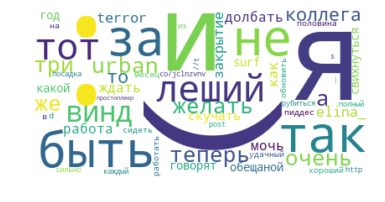

In [39]:
from wordcloud import *
word_freq = [i for i in fd.most_common(100)]
wd = WordCloud(background_color = 'white')
wd.generate_from_frequencies(dict(word_freq))
plt.figure()
plt.imshow(wd, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### Кластеризация слов

In [40]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(top_words_vec)

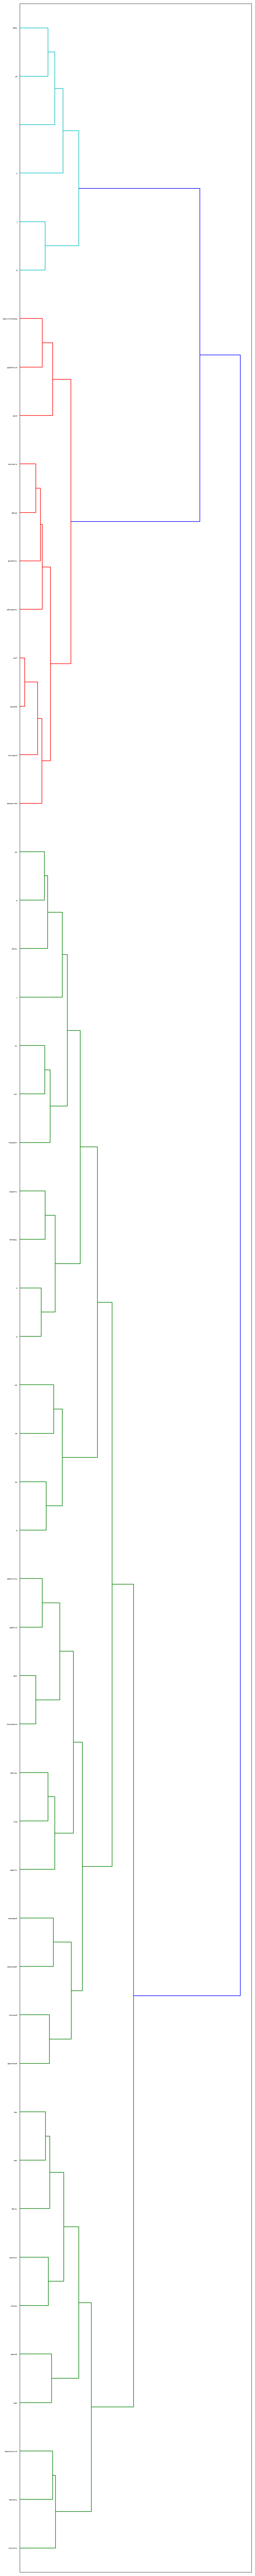

In [41]:
from scipy.cluster.hierarchy import  ward, dendrogram

linkage_matrix = ward(dist) 

fig, ax = plt.subplots(figsize=(10, 100)) 
ax = dendrogram(linkage_matrix, orientation="right", labels=top_words);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() 

plt.savefig('w2v_cluster.png', dpi=200) #save figure as ward_clusters

## Языковые модели

### Модели биграм в NLTK

In [42]:
import nltk

In [43]:
names = [name.strip().lower() for name in open('dinos.txt').readlines()]
print(names[:10])

['aachenosaurus', 'aardonyx', 'abdallahsaurus', 'abelisaurus', 'abrictosaurus', 'abrosaurus', 'abydosaurus', 'acanthopholis', 'achelousaurus', 'acheroraptor']


In [44]:
chars = [char  for name in names for char in name]
freq = nltk.FreqDist(chars)

print(list(freq.keys()))

['q', 'g', 'o', 'c', 'w', 'y', 'd', 'e', 'm', 'r', 'x', 'j', 'v', 's', 'z', 't', 'l', 'u', 'k', 'h', 'b', 'a', 'i', 'n', 'f', 'p']


In [45]:
cfreq = nltk.ConditionalFreqDist(nltk.bigrams(chars))
print(cfreq['a'])

<FreqDist with 26 samples and 2487 outcomes>


In [46]:
cprob = nltk.ConditionalProbDist(cfreq, nltk.MLEProbDist)
print('p(a a) = %1.4f' %cprob['a'].prob('a'))
print('p(a b) = %1.4f' %cprob['a'].prob('b'))
print('p(a u) = %1.4f' %cprob['a'].prob('u'))

p(a a) = 0.0105
p(a b) = 0.0129
p(a u) = 0.3185


In [47]:
l = sum([freq[char] for char in freq])
def unigram_prob(char):
    return freq[char] / l
print('p(a) = %1.4f' %unigram_prob('a'))

p(a) = 0.1354


In [48]:
# можно порождать случайные символы с учётом предыдущих 
cprob['a'].generate()

'm'

### Задание 6

Напишите функцию для генерации нового имени динозавра фиксированной длины.

In [58]:
def dino_name(c=None, n=12):
    c = chr(random.randint(ord('a'), ord('z'))) if c is None else c
    return c if n == 1 else c + dino_name(cprob[c].generate(), n - 1)

for _ in range(10):
    print(dino_name())
print()
for _ in range(10):
    print(dino_name(c='k'))

xisausosausa
jurigoslonti
derossachame
aulbessmauro
eombytalenbo
hiferustospo
jasalusheila
xertaurususa
iruspttadopt
litehuruphus

korusamahono
keavamostaec
kaurusarichi
krabopilasan
kaeysamiusab
kosrniathedu
kruschylengo
kyzichosansk
khussemustrm
karusassapep
